Importing Libraries

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d
import mpl_toolkits.mplot3d.art3d as art3d

Generating Random Dataset

In [247]:
np.random.seed(100)
mu = [2, 5]
cov = [[1, 2], [2, 2]]
num_bins = 100
x, y = np.random.multivariate_normal(mu, cov, 1000).T
n_std = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


Defining the Pearson Correlation Coefficient

In [248]:
def ConfidenceEllipse(x, y, ax, n_std=3, **kwargs):
    # x, y : bivariate normal dataset
    # ax : matplotlib.axes.Axes
    #     The axes object to draw the ellipse into.
    # n_std : float
    #     The number of standard deviations to determine the ellipse's radiuses.

    # Finding the Covariance Matrix of the two normally distributed datasets
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    corr = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1,1])
    radius_x = np.sqrt(1 + corr)
    radius_y = np.sqrt(1 - corr)
    ellipse = Ellipse((0,0), width=radius_x * 2, height=radius_y * 2, **kwargs)

    # The Standard Deviation of a dataset can be calculated by finding the 
    # square root of the variance of that dataset
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
        
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
        
    return corr

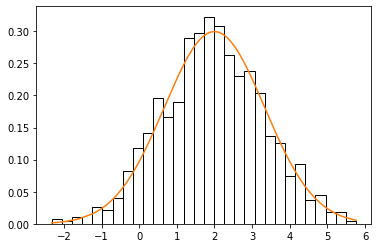

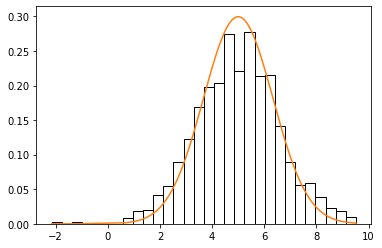

In [249]:
from scipy.stats import norm
import statistics

x.sort()
y.sort()

# Calculating mean and standard deviation
mean_x = statistics.mean(x)
sigma_x = statistics.stdev(x)
mean_y = statistics.mean(x)
sigma_y = statistics.stdev(x)

# Plotting the Probability Distribution Function of dataset: gives us a bell shaped curve

p1 = plt.figure(1)
count_x, bins_x, ignored_x = plt.hist(x, 30, density=True, edgecolor = 'black', facecolor = 'None')
p1.show()

p2 = plt.figure(2)
count_y, bins_y, ignored_y = plt.hist(y, 30, density=True, edgecolor = 'black', facecolor = 'None')
p2.show()

p3 = plt.figure(1)
plt.plot(x, norm.pdf(x, mu[0], sigma_x))
p3.show()

p4 = plt.figure(2)
plt.plot(y, norm.pdf(y, mu[1], sigma_y))
p4.show()



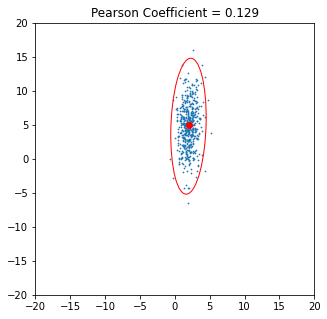

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
np.random.seed(567)
latent = np.random.randn(500, 2)
dependency = np.array([
    [0.4, 0.3],
    [0.1, -0.6]
])
mu = np.array([mu[0], mu[1]]).transpose()
scale = np.array([mu[0], mu[1]]).transpose()
dependent = latent.dot(dependency)
scaled = dependent * scale
scaled_with_offset = scaled + mu

data = np.array([[-3,2,5],[-4,-3,5]]).transpose()
corr = ConfidenceEllipse(scaled_with_offset[:,0],scaled_with_offset[:,1], ax, facecolor='none', edgecolor='red')
radius_x = np.sqrt(1 + corr)
radius_y = np.sqrt(1 - corr)

ax.scatter(scaled_with_offset[:,0], scaled_with_offset[:,1], s=0.5)
ax.scatter([mu[0]], [mu[1]],c='red')

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_title(f'Pearson Coefficient = {corr:.3f}')
plt.show()

Text(0.5, 0.92, 'Pearson Correlation Coefficient = 0.129')

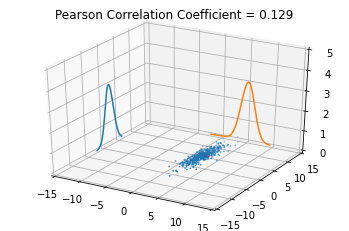

In [259]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_with_offset[:,0], scaled_with_offset[:,1], s=0.5)
ax.scatter([mu[0]], [mu[1]],c='red')

# PDF

ax.plot(x, norm.pdf(x, mu[0], sigma_x)*10, zs=-15, zdir='x')
ax.plot(y, norm.pdf(y, mu[1], sigma_y)*10, zs=+15, zdir='y')

# PDF

ellipse = Ellipse((mu[0], mu[1]), width=radius_x*2, height=radius_y, facecolor = 'none', edgecolor = 'red')

ax.add_patch(ellipse)
art3d.pathpatch_2d_to_3d(ellipse, z=0, zdir="z")

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(0,5)
ax.set_title(f'Pearson Correlation Coefficient = {corr:.3f}')